# **Linear Regression: House Price Prediction**

## **Problem Statement**
---------------------------
Predict the housing prices based on the features of the locality provided to us. In the process, we need to identify the most important features in the dataset. We need to employ techniques of data preprocessing and build a linear regression model that predicts the prices for us. 

----------------------------
## **Data Information**
---------------------------
The data pertains to the houses found in a given California district and some summary stats about them based on the 1990 census data. 

Detailed attribute information is mentioned below:

1. longitude: A measure of how far west a house is; a higher value is farther west
2. latitude: A measure of how far north a house is; a higher value is farther north
3. housingMedianAge: Median age of a house within a block; a lower number is a newer building
4. totalRooms: Total number of rooms within a block
5. totalBedrooms: Total number of bedrooms within a block
6. population: Total number of people residing within a block
7. households: Total number of households, a group of people residing within a home unit, for a block
8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
9. medianHouseValue: Median house value for households within a block (measured in US Dollars)
10. oceanProximity: Location of the house w.r.t se w.r.t ocean/sea


### **Importing libraries**

In [4]:
import pandas as pd
import numpy as np

# Importing libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import ProbPlot

# Importing libraries for building linear regression model using statsmodel
from statsmodels.formula.api import ols
import statsmodels.api as sm

from sklearn.decomposition import PCA

# Importing Linear Regression from sklearn
from sklearn.linear_model import LinearRegression

# Import library for preparing data
from sklearn.model_selection import train_test_split

# Lasso Regression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Import library for data preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

### **Loading data**

In [7]:
data = pd.read_csv("housing.csv")
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


**Observation:**
- There are 20,640 observations and 9 columns, only **total_bedrooms** column has missing data.
- We could replace the null values in **total_bedrooms** column with mean or median value.
- All columns except ocean_proximity are of numeric data type

## **Exploratory Data Analysis**

In [13]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


**Observations:**
* The **median house value** ranges between USD 14,999 and USD 500001 with a mean value of 	206,855 and median of 179,700. This indicates that the price distribution is positively skewed.

* We can see that **total_rooms**, **total_bedrooms**, **population**, **households**, **median_income** columns are also right skewed.

* The mean value for **total_bedrooms** column is 537 and median value is 435. Since the distribution is right skewed, we can replace the null values in this column with median value.


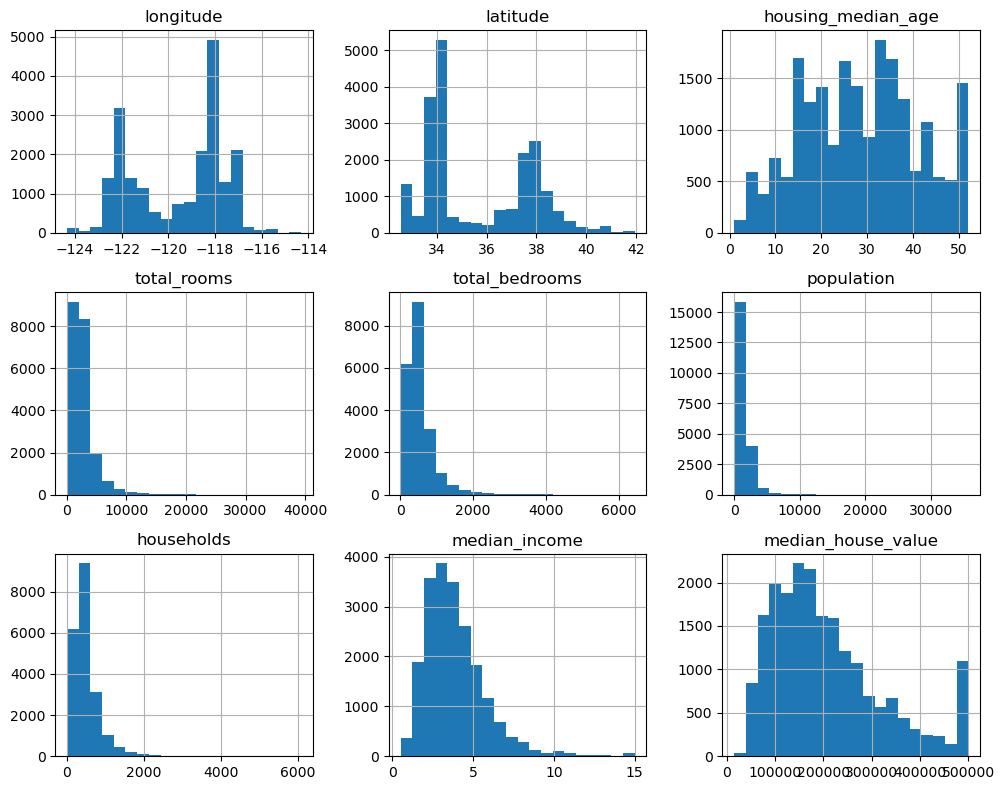

In [16]:
# Plot histograms for numerical columns
data.hist(figsize=(10, 8), bins=20)
plt.tight_layout()
plt.show()

In [17]:
# Replace null values in total_bedrooms column with its median value
data['total_bedrooms'].fillna(data['total_bedrooms'].median(), inplace = True)

In [18]:
# Convert ocean_proximity column to numeric
data['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

**Observation**
- There are 5 unique values in ocean_proximity column. Lets convert this into boolean format using one-hot encoding

In [23]:
# Convert ocean_proximity column to boolean using one-hot encoding
df = pd.get_dummies(data, columns=['ocean_proximity'])

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   20640 non-null  float64
 1   latitude                    20640 non-null  float64
 2   housing_median_age          20640 non-null  float64
 3   total_rooms                 20640 non-null  float64
 4   total_bedrooms              20640 non-null  float64
 5   population                  20640 non-null  float64
 6   households                  20640 non-null  float64
 7   median_income               20640 non-null  float64
 8   median_house_value          20640 non-null  float64
 9   ocean_proximity_<1H OCEAN   20640 non-null  bool   
 10  ocean_proximity_INLAND      20640 non-null  bool   
 11  ocean_proximity_ISLAND      20640 non-null  bool   
 12  ocean_proximity_NEAR BAY    20640 non-null  bool   
 13  ocean_proximity_NEAR OCEAN  206

In [27]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20640.0,536.838857,419.391878,1.0000,297.0000,435.0000,643.25000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


## Data Processing

<Axes: xlabel='median_house_value', ylabel='Count'>

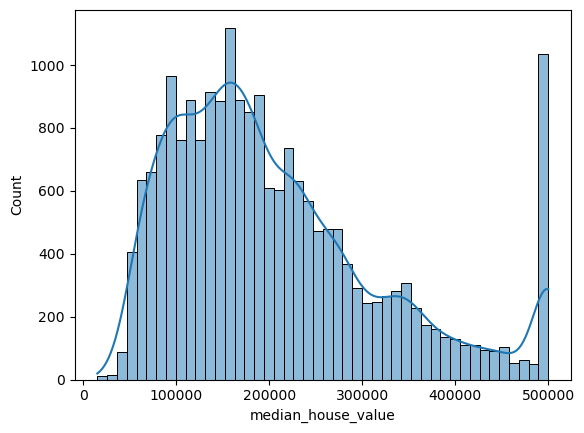

In [30]:
sns.histplot(data = df, x = 'median_house_value', kde = True)

**Observation**:
- We can see from the histogram that the target variable is right skewed, so we will apply a log transformation on the 'median_house_value' column and check the distribution of the transformed column.

In [33]:
df['med_value_log'] = np.log(df['median_house_value'])

<Axes: xlabel='med_value_log', ylabel='Count'>

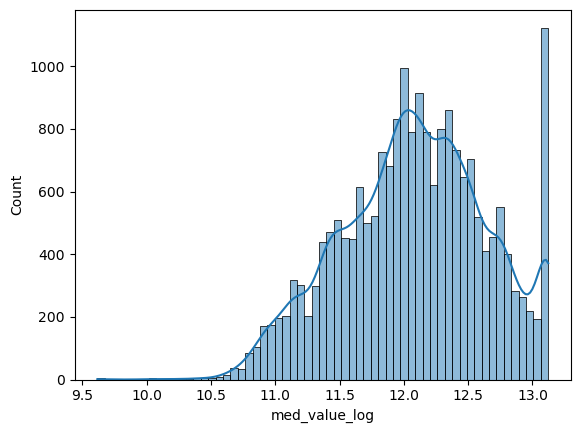

In [35]:
sns.histplot(data = df, x = 'med_value_log', kde = True)

**Observation:**

- The log-transformed variable (**med_value_log**) appears to have an **approx. normal distribution and with less skew**, and hence we can proceed.

## **Bivariate Analysis**

Linear regression assumes a linear relationship between the dependent variable (target) and independent variables (features). Bivariate analysis helps confirm or identify this relationship.

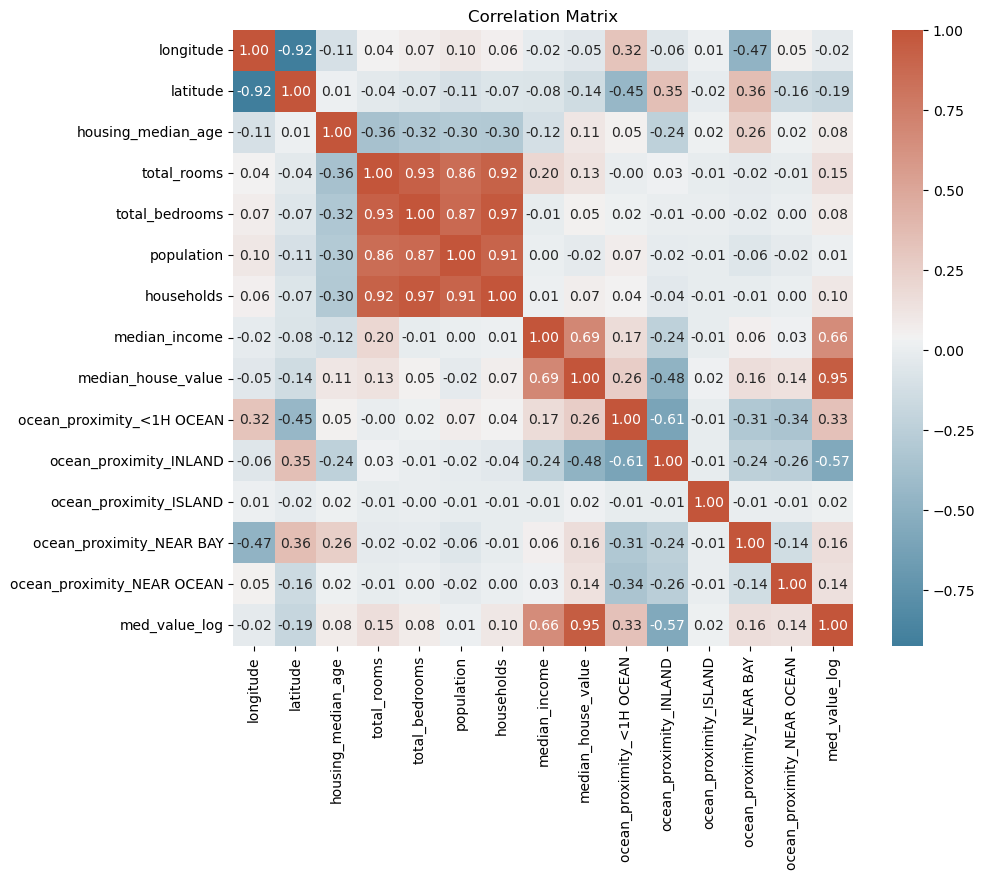

In [40]:
# Let's check the correlation using the heatmap
plt.figure(figsize = (10, 8))
cmap = sns.diverging_palette(230, 20, as_cmap = True)
sns.heatmap(df.corr(), annot = True, fmt = '.2f', cmap = cmap)
plt.title('Correlation Matrix')
plt.show()

**Observation**:
- **median_house_value** and **median_income** columns have strong correlation.
- **ocean_proximity_INLAND** and **median_house_value** columns have negative correlation which shows that houses farther from the coast tend to have lower values.
- We can see that **total_rooms**, **total_bedrooms**, **population**, and **households** columns have **very strong positive correlation**. This indicates **multicollinearity among these features**, which can skew regression results.
- We can either remove these features or use dimensionality reduction techniques, such as PCA to reduce the number of features. We can also use regularization methods to handle multicollinearity.

## Check for multicollinearity

In [453]:
X = df.drop(['median_house_value', 'med_value_log'], axis=1)  # Independent variables
y = df['median_house_value']  # Dependent variable

In [455]:
# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [457]:
# Convert to a dataframe
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

In [459]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to check VIF
def checking_vif(train):
    vif = pd.DataFrame()
    vif["feature"] = train.columns

    # Calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(train.values, i) for i in range(len(train.columns))
    ]
    return vif

In [461]:
print(checking_vif(X_scaled_df))

                       feature        VIF
0                    longitude  18.028444
1                     latitude  19.925764
2           housing_median_age   1.321927
3                  total_rooms  12.349114
4               total_bedrooms  27.040073
5                   population   6.342122
6                   households  28.315383
7                median_income   1.740468
8    ocean_proximity_<1H OCEAN        inf
9       ocean_proximity_INLAND        inf
10      ocean_proximity_ISLAND        inf
11    ocean_proximity_NEAR BAY        inf
12  ocean_proximity_NEAR OCEAN        inf


#### Address Multicollinearity for Dummy Features

In [464]:
X_scaled_df = X_scaled_df.drop(columns=['ocean_proximity_<1H OCEAN'])
print(checking_vif(X_scaled_df))

                       feature        VIF
0                    longitude  18.028444
1                     latitude  19.925764
2           housing_median_age   1.321927
3                  total_rooms  12.349114
4               total_bedrooms  27.040073
5                   population   6.342122
6                   households  28.315383
7                median_income   1.740468
8       ocean_proximity_INLAND   2.853630
9       ocean_proximity_ISLAND   1.002039
10    ocean_proximity_NEAR BAY   1.565746
11  ocean_proximity_NEAR OCEAN   1.197133


#### Address Multicollinearity for Geographic Features (longitude and latitude)

In [467]:
# Combine longitude and latitude into a single feature
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=1)
X_scaled_df['location_cluster'] = kmeans.fit_predict(X_scaled_df[['longitude', 'latitude']])
X_scaled_df = X_scaled_df.drop(columns=['longitude', 'latitude'])
print(checking_vif(X_scaled_df))

                       feature        VIF
0           housing_median_age   1.340088
1                  total_rooms  12.307574
2               total_bedrooms  26.647861
3                   population   6.276415
4                   households  27.790500
5                median_income   1.726023
6       ocean_proximity_INLAND   1.465474
7       ocean_proximity_ISLAND   1.001306
8     ocean_proximity_NEAR BAY   1.209171
9   ocean_proximity_NEAR OCEAN   1.273511
10            location_cluster   1.186593


#### Address Multicollinearity for total_bedrooms and households

In [470]:
# Combine them into a ratio or new feature (bedrooms_per_household)
X_scaled_df['bedrooms_per_household'] = X_scaled_df['total_bedrooms'] / X_scaled_df['households']
X_scaled_df = X_scaled_df.drop(columns=['total_bedrooms', 'households'])
print(checking_vif(X_scaled_df))

                      feature       VIF
0          housing_median_age  1.336108
1                 total_rooms  4.770006
2                  population  4.482689
3               median_income  1.316096
4      ocean_proximity_INLAND  1.402182
5      ocean_proximity_ISLAND  1.000949
6    ocean_proximity_NEAR BAY  1.204043
7  ocean_proximity_NEAR OCEAN  1.275538
8            location_cluster  1.198868
9      bedrooms_per_household  1.016090


In [472]:
# Splitting the data in 70:30 ratio of train to test data
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.3, random_state=1)

In [474]:
X_train.head()

,housing_median_age,total_rooms,population,median_income,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,location_cluster,bedrooms_per_household
5748,-1.083767,1.100238,1.535208,-0.503149,-0.681889,-0.015566,-0.353264,-0.384466,0,1.028644
5592,0.982143,-0.289592,0.205330,-0.364659,-0.681889,-0.015566,-0.353264,-0.384466,0,1.169148
2110,1.617807,-0.139699,-0.119633,-0.715648,1.466514,-0.015566,-0.353264,-0.384466,2,3.107787
13901,-1.083767,1.967506,1.008909,-0.700173,1.466514,-0.015566,-0.353264,-0.384466,3,1.571755
18425,-1.719432,0.446119,0.276858,0.333002,-0.681889,-0.015566,-0.353264,-0.384466,1,1.070016


In [478]:
from sklearn.linear_model import LinearRegression
# Initialize the Linear Regression model
linear_reg = LinearRegression()
# Fit the model on the scaled training data
linear_reg.fit(X_train, y_train)
# Make predictions on the test set
y_pred = linear_reg.predict(X_test)
# y_pred_log = linear_reg.predict(X_test)
# y_pred = np.exp(y_pred_log)  # Inverse transformation to original scale

## Evaluate the model

In [484]:
# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Linear Regression RMSE:", rmse)
print("Linear Regression R²:", r2)

Linear Regression RMSE: 71458.0933719459
Linear Regression R²: 0.6115977154364881


**Summary:**
- RMSE of 71,458.09 shows that the model has a significant error (roughly 14-15% of the price), and it doesn’t always predict prices accurately.
- R² = 0.6116 indicates that about 61.16% of the variation in house prices is explained by the features in your model. The remaining 38.84% of the variance is due to factors that your model isn't capturing.

In [502]:
# Print the model coefficients
coefficients = pd.Series(linear_reg.coef_, index=X_train.columns)
print("Linear Regression Coefficients:")
print(coefficients)

Linear Regression Coefficients:
housing_median_age            11956.349906
total_rooms                   30916.268885
population                   -26565.711589
median_income                 65740.023355
ocean_proximity_INLAND       -33426.019233
ocean_proximity_ISLAND         2630.652903
ocean_proximity_NEAR BAY       4575.487058
ocean_proximity_NEAR OCEAN    10261.370525
location_cluster              -9947.088793
bedrooms_per_household           60.075222
dtype: float64


**Observation:**

*Most Impactful Features (Higher Coefficients)*
- median_income: The strongest predictor of house prices. A rise in median income increases the ability of households to afford higher house prices.
- total_rooms: The size of the house (in terms of total rooms) has a strong positive impact on the price.
- ocean_proximity_INLAND: Being located inland (as opposed to near the ocean) significantly reduces house prices.

*Least Impactful Features (Lower Coefficients)*
- ocean_proximity_ISLAND: The effect of being located on an island is relatively small compared to other geographical features like proximity to the ocean or bay.
- bedrooms_per_household: While bedrooms per household is a positive feature, its effect is still relatively small compared to house size or location-related features.
- location_cluster: Location clusters seem to have a moderate negative impact on prices, but are less influential than income, house size, and proximity to the ocean.

**Key Takeaways:**
* The most impactful factors on house prices are income and house size, which have large positive coefficients.
* Geographical location has a substantial impact, with oceanfront and near-ocean locations being highly valued, while inland locations tend to reduce prices.
* Population density seems to negatively affect house prices, suggesting that more crowded areas could be less desirable in terms of housing value.

